## Broadband transmission pattern
Compute a broadband transmission pattern by adding up those calculated at a series of single wavelengths, weighted using the NOMIC bandpass.

In [1]:
import numpy as np
import ni
import matplotlib.pyplot as plt
import scipy.ndimage

%matplotlib notebook

In [2]:
# basic target and image setup
ha = 1.0
dec = -23.0
nx = 100
ny = nx
arcsec_pix = 0.01

In [3]:
# get transmission image
def get_tx(o):
    ll = o.parallactic_angle(ha, dec, has_input='ha')
    x = np.arange(nx*2) - (nx*2-1)/2.
    y = np.arange(ny*2) - (ny*2-1)/2.
    xx,yy = np.meshgrid(x, y)
    t = o.t_null(xx*arcsec_pix)
    t = scipy.ndimage.interpolation.rotate(t, ll, reshape=False)
    t = t[nx//2:nx+nx//2, ny//2:ny+ny//2]
    return t

<IPython.core.display.Javascript object>


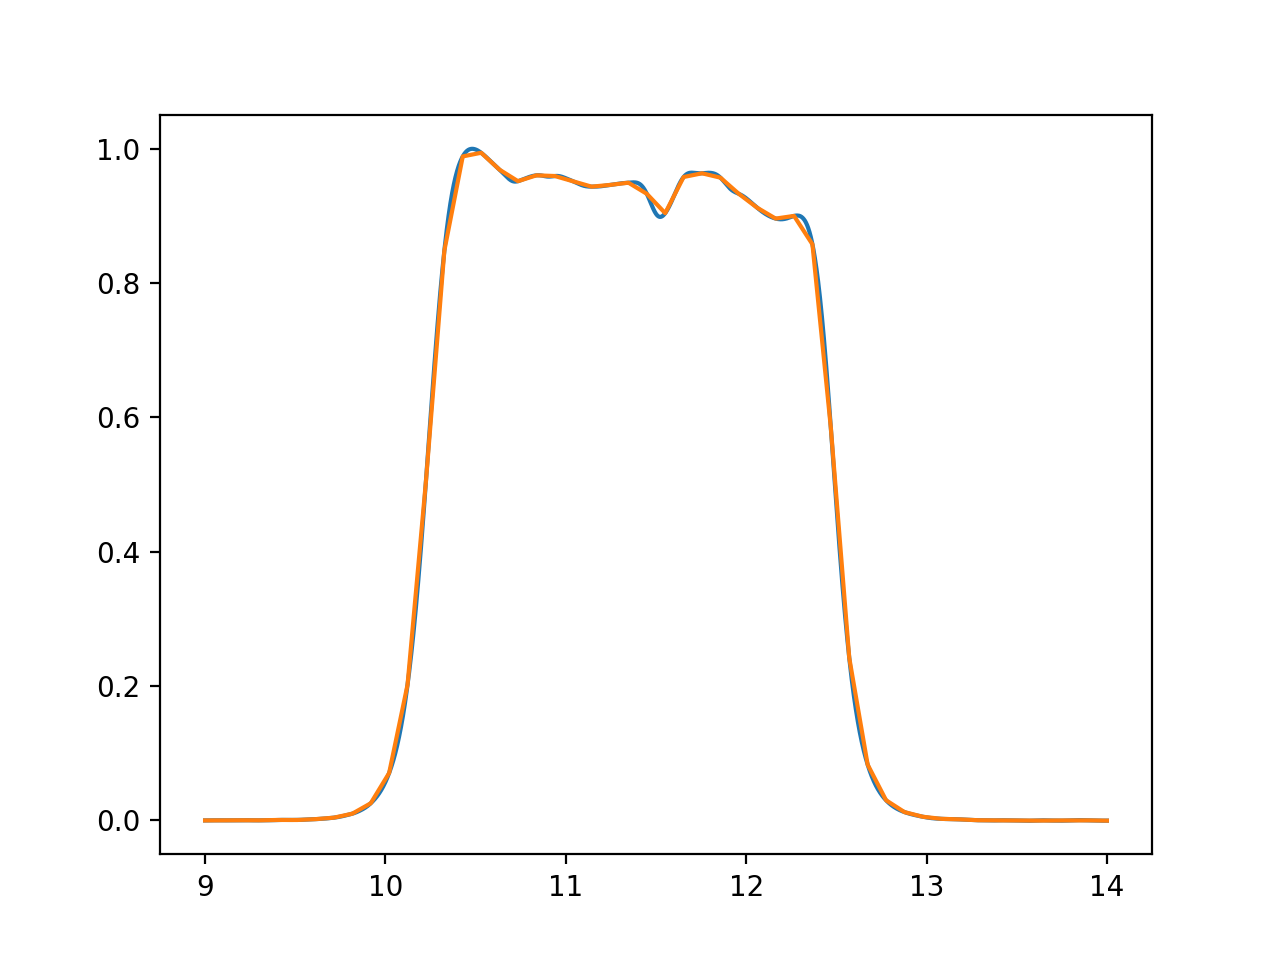

In [9]:
ws_full, bp_full = np.genfromtxt('../data/Nprime_filter_curve.txt', skip_header=1, unpack=True)
ws = np.linspace(np.min(ws_full), np.max(ws_full), num=50)
bp = np.interp(ws, ws_full, bp_full)

fig, ax = plt.subplots()
ax.plot(ws_full, bp_full)
ax.plot(ws, bp)

In [10]:
# get the transmission at each wavelength and add with weight
t = np.zeros((nx,ny))
for w,b in zip(ws,bp):
    o = ni.Observatory(wav=w)
    t += get_tx(o) * b
    
t /= np.sum(bp)

<IPython.core.display.Javascript object>


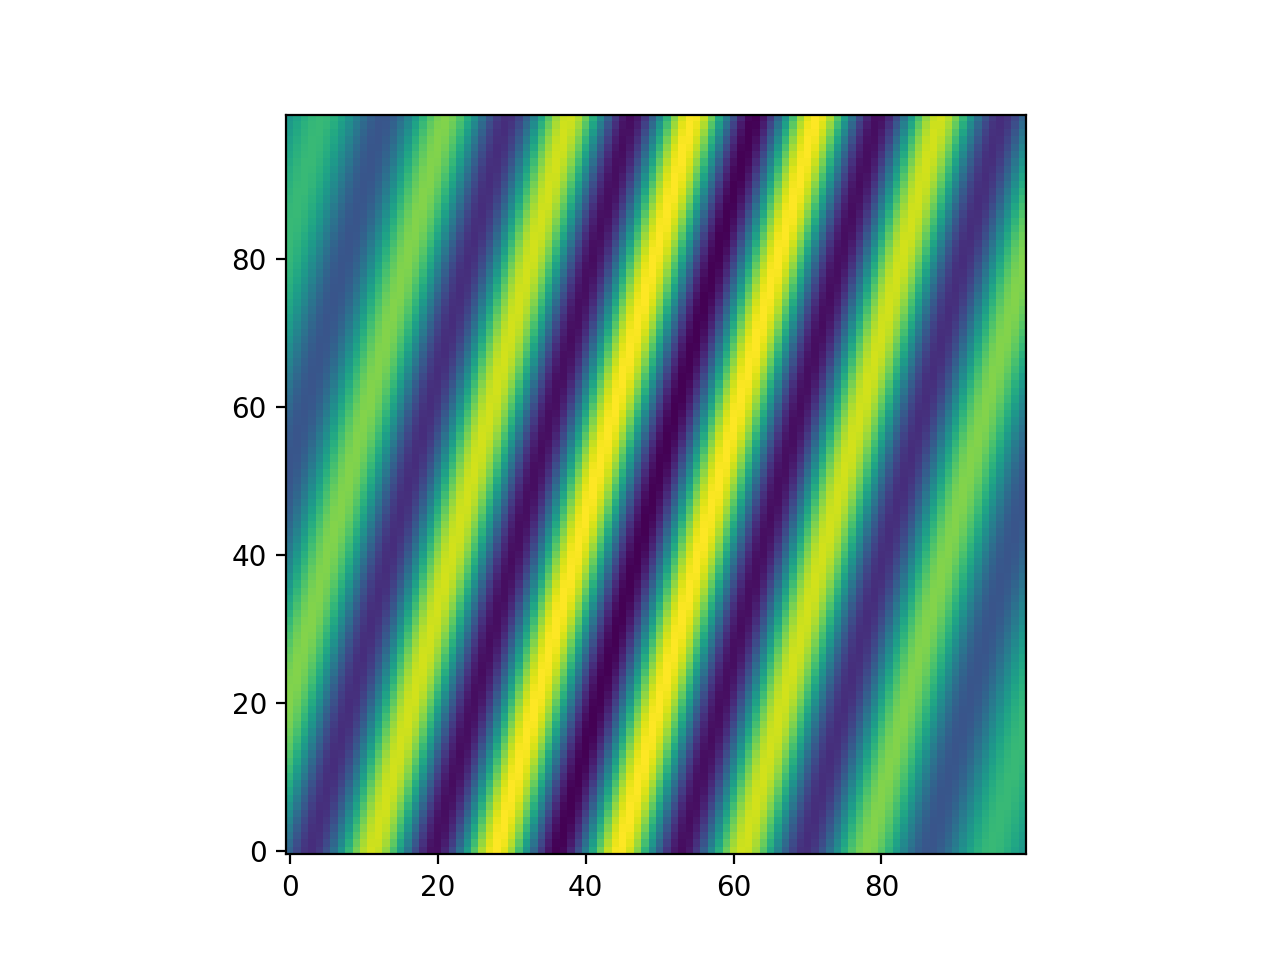

In [11]:
fig, ax = plt.subplots()
ax.imshow(t, origin='bottom')